Our objective is to analyze the OnlineRetail.csv dataset and build a K-means clustering machine learning model. 
This model will help us to segment customers based on their purchasing behavior
(specifically using Recency, Frequency, and Monetary values) into distinct groups.

The ultimate goal is to understand these customer segments, which can then inform targeted marketing strategies and
business decisions. 
We are proceeding step-by-step to ensure a thorough understanding of each stage of the model-building process.

In [1]:
import pandas as pd
#Load the dataset
df = pd.read_csv('OnlineRetail.csv',encoding='latin1')

#Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head().to_markdown(index=False,numalign='left', stralign='left'))

#Display the summary of descriptive statistics report
print("\nsummary statistics of the dataset:")
print(df.describe().to_markdown(index=False,numalign='left',stralign='left'))

#Display the column information
print("\nInformation about the columns:")
print(df.info())

First 5 rows of the dataset:
| InvoiceNo   | StockCode   | Description                         | Quantity   | InvoiceDate      | UnitPrice   | CustomerID   | Country        |
|:------------|:------------|:------------------------------------|:-----------|:-----------------|:------------|:-------------|:---------------|
| 536365      | 85123A      | WHITE HANGING HEART T-LIGHT HOLDER  | 6          | 01-12-2010 08:26 | 2.55        | 17850        | United Kingdom |
| 536365      | 71053       | WHITE METAL LANTERN                 | 6          | 01-12-2010 08:26 | 3.39        | 17850        | United Kingdom |
| 536365      | 84406B      | CREAM CUPID HEARTS COAT HANGER      | 8          | 01-12-2010 08:26 | 2.75        | 17850        | United Kingdom |
| 536365      | 84029G      | KNITTED UNION FLAG HOT WATER BOTTLE | 6          | 01-12-2010 08:26 | 3.39        | 17850        | United Kingdom |
| 536365      | 84029E      | RED WOOLLY HOTTIE WHITE HEART.      | 6          | 01-12-2010 08:

Step 2 - Data Cleaning and preprocessing
This step addresses the missing values, invalid entries to prepare the dataset for prediction model

In [2]:
import pandas as pd
import datetime as dt

#Lets first drop rows with the missing customer id
df_cleaned = df.dropna(subset=['CustomerID'])

#Remove Rows with missing description
df_cleaned = df_cleaned.dropna(subset=['Description'])

#Remove rows with negative or zero quantity
df_cleaned = df_cleaned[df_cleaned['Quantity']>0]

#Remove rows with negative unit price
df_cleaned = df_cleaned[df_cleaned['UnitPrice']>0]

#Convert invoice time to date time objects
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'],format='%d-%m-%Y %H:%M')

#Calculate total price(revenue) - here we're creating a new column to be used in monetary calculation
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

print("--- Data Cleaning & Preprocessing Complete ---")
print("First 5 rows of the cleaned dataset:")
print(df.head().to_markdown(index=False,numalign='left', stralign='left'))
print("\nInformation about the cleaned data columns:")
print(df_cleaned.info())


--- Data Cleaning & Preprocessing Complete ---
First 5 rows of the cleaned dataset:
| InvoiceNo   | StockCode   | Description                         | Quantity   | InvoiceDate      | UnitPrice   | CustomerID   | Country        |
|:------------|:------------|:------------------------------------|:-----------|:-----------------|:------------|:-------------|:---------------|
| 536365      | 85123A      | WHITE HANGING HEART T-LIGHT HOLDER  | 6          | 01-12-2010 08:26 | 2.55        | 17850        | United Kingdom |
| 536365      | 71053       | WHITE METAL LANTERN                 | 6          | 01-12-2010 08:26 | 3.39        | 17850        | United Kingdom |
| 536365      | 84406B      | CREAM CUPID HEARTS COAT HANGER      | 8          | 01-12-2010 08:26 | 2.75        | 17850        | United Kingdom |
| 536365      | 84029G      | KNITTED UNION FLAG HOT WATER BOTTLE | 6          | 01-12-2010 08:26 | 3.39        | 17850        | United Kingdom |
| 536365      | 84029E      | RED WOOLLY

Step 3 - RFM (Recency, Frequency, Monetary) analysis -Key metrices that catgorise Customer segmentation & helps understand
the customer's purchasing behaviour. We create a new dataframe itself.

In [3]:
#Recency
#We use the latest dates in the data set to use it as a reference point
latest_date = df_cleaned['InvoiceDate'].max()

#Let's find each customer and their latest purchase date to calculate the difference in days.
recency_df = df_cleaned.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (latest_date - recency_df['InvoiceDate']).dt.days

#Frequency 
#For each customer calculate the number of unique InvoiceNo 
frequency_df = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.rename(columns={'InvoiceNo':'Frequency'},inplace=True)

#Monetary
#For each customer sum up their TotalPrice(i.e revenue)
monetary_df = df_cleaned.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_df.rename(columns={'TotalPrice':'Monetary'},inplace=True)

#Merge all three RFM feautures into a single dataframe 
rfm_df = recency_df.merge(frequency_df,on='CustomerID')
rfm_df = rfm_df.merge(monetary_df,on='CustomerID')

#Drop the original InvoiceDate columns from rfm_df as it's no longer needed after calculating the Recency
rfm_df = rfm_df.drop('InvoiceDate',axis=1)


print("--- RFM Analysis Complete ---")
print("First 5 rows of the RFM dataframe:")
print(rfm_df.head().to_markdown(index=False,numalign='left',stralign='left'))
print("\nSummary statistics of the RFM dataframe:")
print(rfm_df.describe().to_markdown(index=False,numalign='left',stralign='left'))


--- RFM Analysis Complete ---
First 5 rows of the RFM dataframe:
| CustomerID   | Recency   | Frequency   | Monetary   |
|:-------------|:----------|:------------|:-----------|
| 12346        | 325       | 1           | 77183.6    |
| 12347        | 1         | 7           | 4310       |
| 12348        | 74        | 4           | 1797.24    |
| 12349        | 18        | 1           | 1757.55    |
| 12350        | 309       | 1           | 334.4      |

Summary statistics of the RFM dataframe:
| CustomerID   | Recency   | Frequency   | Monetary   |
|:-------------|:----------|:------------|:-----------|
| 4338         | 4338      | 4338        | 4338       |
| 15300.4      | 91.5364   | 4.27201     | 2054.27    |
| 1721.81      | 100.014   | 7.698       | 8989.23    |
| 12346        | 0         | 1           | 3.75       |
| 13813.2      | 17        | 1           | 307.415    |
| 15299.5      | 50        | 2           | 674.485    |
| 16778.8      | 141       | 5           | 1661.74   

Step 4 - Data Scaling 
Standardization (using StandardScaler) is a common scaling technique. 
It transforms the data so that it has a mean of 0 and a standard deviation of 1. 
This ensures that all features contribute equally to the distance calculations.

In [5]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

#Let's select RFM features for scaling
rfm_features = rfm_df[['Recency','Frequency','Monetary']]

#Now let's bring in & intialise standard scalar into the picture
scaler = StandardScaler()

#Let's apply standard scaler to the RFM features
rfm_scaled = scaler.fit_transform(rfm_features)

#Convert the scaled data to a dataframe
#Here we use rfm_df's index to maintain customerid assiciation implicitly.
rfm_scaled_df = pd.DataFrame(rfm_scaled,columns=(rfm_features.columns),index=rfm_df.index)

print("--- Data Scaling Complete ---")
print("First 5 rows of the scaled RFM dataframe:")
print(rfm_scaled_df.head().to_markdown(index=False, numalign="left", stralign="left"))



--- Data Scaling Complete ---
First 5 rows of the scaled RFM dataframe:
| Recency   | Frequency   | Monetary   |
|:----------|:------------|:-----------|
| 2.33457   | -0.425097   | 8.35867    |
| -0.90534  | 0.354417    | 0.250966   |
| -0.17536  | -0.0353399  | -0.028596  |
| -0.735345 | -0.425097   | -0.0330118 |
| 2.17458   | -0.425097   | -0.191347  |


Step 5 - Determine the total no of clusters (k) using elbow method
It sums the squared distance within each cluster. 
With a set of range the k-means clustering will intialse and find different K values and calculates wcss for each of those range. 
Then it plots a curve between the no of clusters and the calculated wcss values.
When there is a sharp dip, that point is the final determined worthy k value as
any no of clusters beyond this point is considered obsolete.

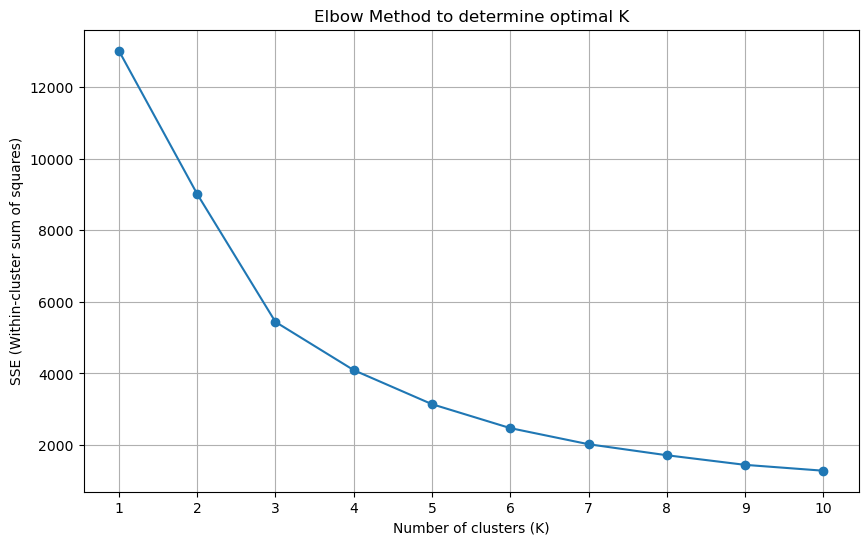


--- Elbow Method Plot Generated ---
Observe the plot to find the 'elbow' point where the decrease in SSE slows down significantly.
A common observation for this dataset suggests K=3 or K=4 might be optimal.


In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Let's assign a variable in dictionary to store the sum of squared errors for each K
sse={}

#Using a for loop, let's now iterate from K=1 to K=10

for k in range(1,11):
    # Initialize KMeans model with 'k' clusters and a random_state for reproducibility
    # n_init=10 is added to suppress a future warning and explicitly set the number of initializations
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit the KMeans model to the scaled RFM data
    kmeans.fit(rfm_scaled)
    
    # Store the inertia (SSE) for the current K
    sse[k] = kmeans.inertia_
    
#Let's plot the elbow method graph
plt.figure(figsize=(10,6)) # For Visualisation
plt.plot(list(sse.keys()),list(sse.values()),marker='o',linestyle='-') #Here we plot K with it's respective sse
plt.xlabel("Number of clusters (K)") #x-axis label
plt.ylabel("SSE (Within-cluster sum of squares)") #y-axis label
plt.title("Elbow Method to determine optimal K") #Title of the plot
plt.xticks(np.arange(1,11,1))#Ensures x-axis ticks are integers from 1 to 10
plt.grid()#Showcases the grid lines for better visualisation
plt.show()#to display the plot

print("\n--- Elbow Method Plot Generated ---")
print("Observe the plot to find the 'elbow' point where the decrease in SSE slows down significantly.")
print("A common observation for this dataset suggests K=3 or K=4 might be optimal.")

In [11]:
#Step 6 - Build K-means model and anlayse clusters

import pandas as pd
from sklearn.cluster import KMeans

#Let's define the optimal K values
optimal_k = 3

kmeans_model = KMeans(n_clusters=optimal_k,random_state=42,n_init=10)

#Now let's fit the k-means model into the scaled RFM data
kmeans_model.fit(rfm_scaled)

# Add the cluster labels to the original (unscaled) RFM dataframe
# This allows us to interpret the clusters using the original Recency, Frequency, Monetary values
#.labels_ stores the cluster labels assigned to each data point after the clustering algorithm has been fit to the data.
rfm_df['Cluster'] = kmeans_model.labels_

# Analyze the characteristics of each cluster
# Group by the new 'Cluster' column and calculate the mean of RFM features for each cluster
cluster_analysis = rfm_df.groupby('Cluster')[['Recency','Frequency','Monetary']].mean().reset_index()

# Sort the clusters by Monetary value in descending order for better interpretation
# This helps in quickly identifying the most valuable customer segment
cluster_analysis = cluster_analysis.sort_values(by='Monetary',ascending=False)

print(f"\n--- K-means Clustering Results with K={optimal_k} ---")
print("Mean RFM values for each cluster:")
print(cluster_analysis.to_markdown(index=False, numalign="left", stralign="left"))



--- K-means Clustering Results with K=3 ---
Mean RFM values for each cluster:
| Cluster   | Recency   | Frequency   | Monetary   |
|:----------|:----------|:------------|:-----------|
| 1         | 5.03846   | 66.4231     | 85904.4    |
| 0         | 40.4542   | 4.67276     | 1855.94    |
| 2         | 246.106   | 1.58226     | 631.424    |


Interpretation of Clusters:
Based on the mean RFM values for each cluster, we can interpret them as follows:

Cluster 1 (Top Customers / Loyal Customers):

Recency: Very low (around 5 days). This means these customers have made a purchase very recently.
Frequency: Very high (around 66 purchases). They buy very frequently.
Monetary: Very high (around $85,904). They spend a significant amount of money.
Interpretation: This segment represents your most valuable, highly engaged, and recently active customers. They are the backbone of your business and should be prioritized for loyalty programs and exclusive offers.


Cluster 0 (Regular Customers):

Recency: Moderate (around 40 days). They have purchased somewhat recently.
Frequency: Moderate (around 4-5 purchases). They buy regularly, but not as frequently as Cluster 2.
Monetary: Moderate (around $1,856). They spend a decent amount but not as much as the top tier.
Interpretation: This cluster consists of consistent customers who engage periodically. They are a good segment to focus on for retention and growth strategies to increase their frequency and monetary value.


Cluster 2 (New/Churning Customers):

Recency: High (around 246 days). They have not purchased for a long time.
Frequency: Low (around 1-2 purchases). They have made very few purchases.
Monetary: Low (around $631). They have spent the least amount of money.
Interpretation: This segment likely includes new customers who made a single purchase and haven't returned, or customers who are on the verge of churning. They require targeted re-engagement campaigns, special offers, or win-back strategies to encourage them to become active again.

In [12]:
# Examples of customers in each cluster
print("\nExamples from Cluster 0 (New/Churning Customers):")
print(rfm_df[rfm_df['Cluster'] == 0].head(3).to_markdown(index=False, numalign="left", stralign="left"))

print("\nExamples from Cluster 1 (Regular Customers):")
print(rfm_df[rfm_df['Cluster'] == 1].head(3).to_markdown(index=False, numalign="left", stralign="left"))

print("\nExamples from Cluster 2 (Top Customers / Loyal Customers):")
print(rfm_df[rfm_df['Cluster'] == 2].head(3).to_markdown(index=False, numalign="left", stralign="left"))


Examples from Cluster 0 (New/Churning Customers):
| CustomerID   | Recency   | Frequency   | Monetary   | Cluster   |
|:-------------|:----------|:------------|:-----------|:----------|
| 12347        | 1         | 7           | 4310       | 0         |
| 12348        | 74        | 4           | 1797.24    | 0         |
| 12349        | 18        | 1           | 1757.55    | 0         |

Examples from Cluster 1 (Regular Customers):
| CustomerID   | Recency   | Frequency   | Monetary   | Cluster   |
|:-------------|:----------|:------------|:-----------|:----------|
| 12415        | 23        | 21          | 124915     | 1         |
| 12748        | 0         | 209         | 33719.7    | 1         |
| 12971        | 3         | 86          | 11189.9    | 1         |

Examples from Cluster 2 (Top Customers / Loyal Customers):
| CustomerID   | Recency   | Frequency   | Monetary   | Cluster   |
|:-------------|:----------|:------------|:-----------|:----------|
| 12346        | 325       